In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [16]:
img = cv2.imread("image.jpg")


In [17]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [18]:
#converting o 2D form
newImage = img.reshape((-1,3))
newImage = np.float32(newImage)

#Notice differnet in dimension
print(img.shape,newImage.shape)

(539, 960, 3) (517440, 3)


In [19]:
#stopping criteria

stopCriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [20]:
K = 3

ret,label,center=cv2.kmeans(newImage,K,None,stopCriteria,10,cv2.KMEANS_PP_CENTERS)

In [21]:
# convert back to 8 bit values
center = np.uint8(center)

# flatten the labels array
label = label.flatten()

In [22]:
segmentedImage = center[label.flatten()]

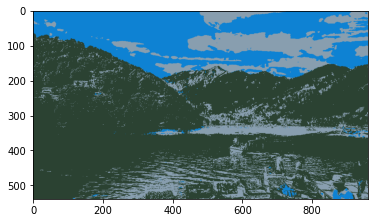

In [23]:
# reshape back to the original image dimension
segmentedImage = segmentedImage.reshape(img.shape)
# show the image
plt.imshow(segmentedImage)
plt.show()

In [24]:
#We can see in the above image
#   3 types of clusters are formed majorly for sky,clouds and water+mountains

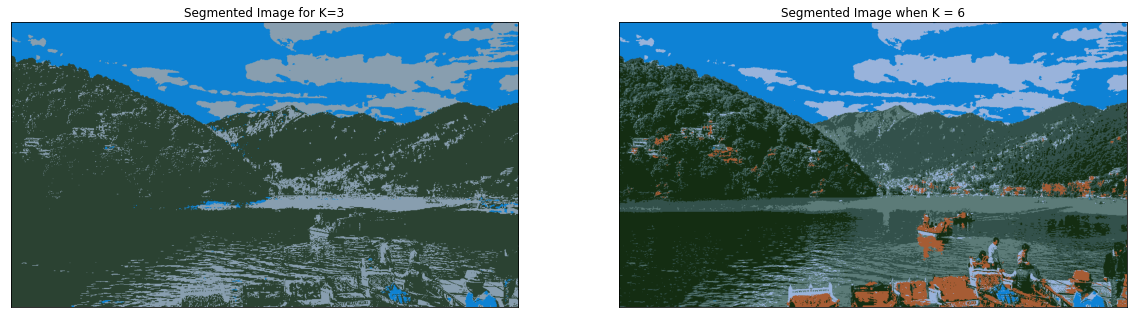

In [25]:
#now let us see the result for K = 6 clusters
K = 6

ret,label,center=cv2.kmeans(newImage,K,None,stopCriteria,10,cv2.KMEANS_PP_CENTERS)


center = np.uint8(center)
label = label.flatten()


segmentedImageT =  center[label.flatten()]
segmentedImageT = segmentedImageT.reshape(img.shape)
picSize = 20
plt.figure(figsize=(picSize,picSize))
plt.subplot(1,2,1),plt.imshow(segmentedImage)
plt.title('Segmented Image for K=3'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(segmentedImageT)
plt.title('Segmented Image when K = 6'), plt.xticks([]), plt.yticks([])
plt.show()



In [26]:
#Now for K=6 segmented image we can see many more clusters suach as people on the side and houses on hills
#and houses on side of the river are in different cluster which was not there for K=3



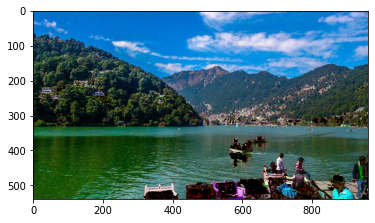

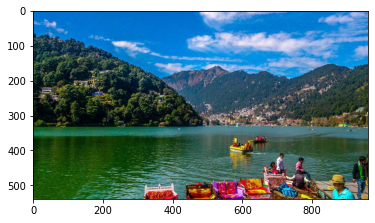

In [27]:
#Now let us try to remove some clusters and see the result in K=6 image

img1 = np.copy(img)
img1 = img1.reshape((-1,3))
img1[label==4] = [0,0,0]
img1 = img1.reshape(img.shape)
plt.imshow(img1)
plt.show()
plt.imshow(img)
plt.show()

In [28]:
#Notice the obvious difference between the 2 images
#Done
